In [1]:
# Step 1: Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
print('Libraries imported.')


Libraries imported.


In [3]:
# Step 2: Load the raw dataset

print('Loading dataset...')

df = pd.read_csv('../data/raw/house_data.csv') 

print('Dataset loaded successfully')
print(f'Initial data shape: {df.shape}')
print('\nPreciew of data:')
df.head()


Loading dataset...
Dataset loaded successfully
Initial data shape: (84, 7)

Preciew of data:


,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,495000,1527,2,1.5,Suburb,1956,Good
1,752000,2526,3,2.5,Downtown,1998,Excellent
2,319000,1622,2,1.5,Rural,1975,Fair
3,1210000,3102,4,3.0,Waterfront,2005,Excellent
4,462000,1835,2,2.0,Urban,1982,Good


In [4]:
# Step 3: Understand structure -- schema, datatypes, nulls

print('\nData types and null values check...')
print(df.info())

print('\nAny missing values?')
print(df.isnull().sum())



Data types and null values check...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None

Any missing values?
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [5]:
# Step 3: Drop malformed rows (like the one with missing columns)
df = df.dropna()
df = df[df['price'] > 10000] # basic sanity checks
df = df[df['sqft'] > 200]


In [6]:
# Step 4: Standardize column names (basic cleanup)
print('Cleaning column names (lowercase, undescores)...')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print('Column names standardized:')
print(df.columns.tolist())


Cleaning column names (lowercase, undescores)...
Column names standardized:
['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


In [7]:
# Step 5: Basic static check (spot outliers or issues)
print('Basic summary stats dor numeric columns:')
print(df.describe())


Basic summary stats dor numeric columns:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000


Plotting distribution of house prices...


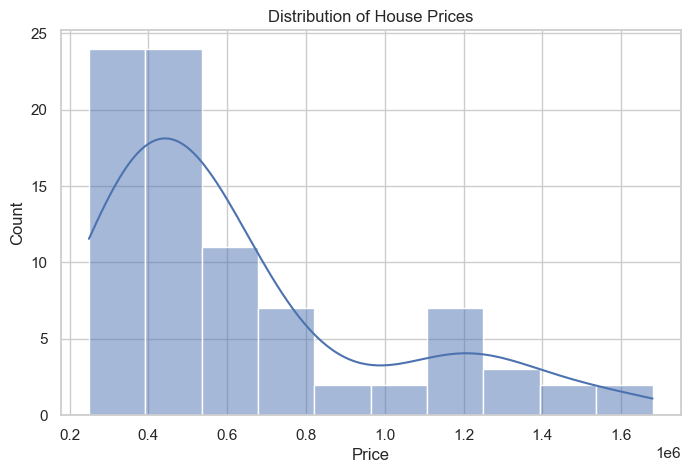

In [8]:
# Step 6: Visual check for distrubtions (e.g. price, sqft)
print('Plotting distribution of house prices...')

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=10)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [9]:
# Step 7: Check for obvious data issues
print('Looking for negative or unrealistc values...')

for col in ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built']:
    invalid = df[df[col] < 0]
    if not invalid.empty:
        print(f'Found negative values in {col}:\n{invalid}')
    else:
        print(f'No negative values found in {col}')


Looking for negative or unrealistc values...
No negative values found in price
No negative values found in sqft
No negative values found in bedrooms
No negative values found in bathrooms
No negative values found in year_built


In [10]:
# Step 8: Drop duplicates if any
print('Checking for duplicate rows...')

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f'Found {duplicates} duplicate rows. Dropping them...')
else:
    print('No duplicate rows found.')


Checking for duplicate rows...
No duplicate rows found.


In [11]:
# Step 9: Save the cleaned version 
print('Saving cleaned version to file (optional step)')

# df.to_csv('../data/interim/cleaned_house_data_v1.csv', index=False)
print('Data engineering preprocessing complete.')


Saving cleaned version to file (optional step)
Data engineering preprocessing complete.
